In [1]:
# This program provides a recommender system for movies based.  If you choose a movie, the program will recommend other to you
# This is based off of a ratings that the same users gave to each others movies.  A simple correlation matrix
# At the end, we will find the correlation for two movies, a sci-fi: Star Wars and a comedy: Liar Liar
#

In [2]:
# Import Librairies

import numpy as np
import pandas as pd

In [3]:

columns_names = ['user_d','item_id','rating','timestamp']

In [4]:
# Import the rating ids  
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [5]:

df.head()

,user_d,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
# import a seperate file that links the item_id to the movie_title

movie_titels=pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titels.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
# Merge the two dataframes based on 'item_id'

df = pd.merge(df,movie_titels,on='item_id')

In [9]:
df.head()

,user_d,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [10]:
# Import the visualization librairies 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("white")

%matplotlib inline

In [11]:
# Look at the movies based on average rating

df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [12]:
#find the top 15 highest rated movies

df.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

title
Marlene Dietrich: Shadow and Light (1996)            5.000
Prefontaine (1997)                                   5.000
Santa with Muscles (1996)                            5.000
Star Kid (1997)                                      5.000
Someone Else's America (1995)                        5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Saint of Fort Washington, The (1993)                 5.000
Great Day in Harlem, A (1994)                        5.000
They Made Me a Criminal (1939)                       5.000
Aiqing wansui (1994)                                 5.000
Pather Panchali (1955)                               4.625
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Some Mother's Son (1996)                             4.500
Name: rating, dtype: float64

In [13]:
#Highest rated movies might only have one rating, so let's see what movie has the most ratings

df.groupby('title')['rating'].count().sort_values(ascending=False).head(15)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: rating, dtype: int64

In [14]:
# Create a new dataframe based on the movie and it's ratings with the title as inex

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
# add the number of ratings to the new dataframe

ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [17]:
ratings.head(15)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


Text(0.5, 0, 'Number of Ratings')

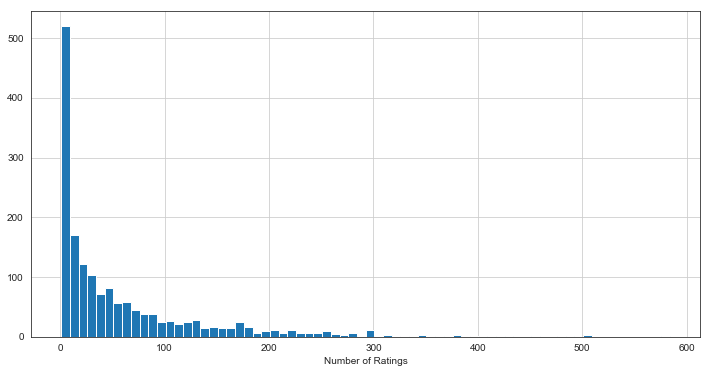

In [19]:
# Plot the number of ratings

plt.figure(figsize=(12,6))
ratings['num of ratings'].hist(bins = 70)
plt.xlabel('Number of Ratings')

# A LOT OF MOVIES ONLY HAVE 1 REVIEWS


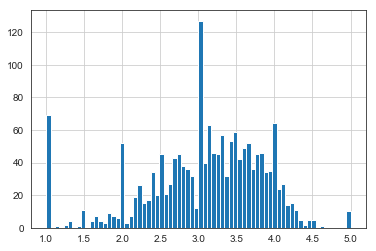

In [25]:
# Look at the spread of ratings 

ratings['rating'].hist(bins=70)

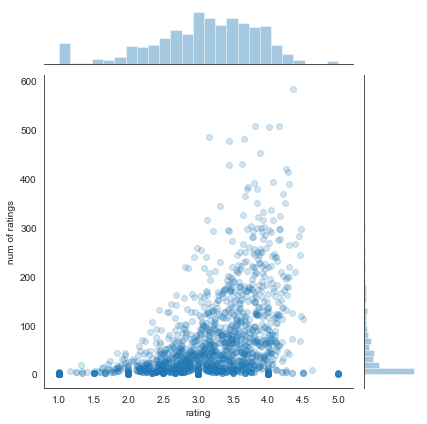

In [40]:
# the relationship between avg rating and number of rating

sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.2) #"scatter" | "reg" | "resid" | "kde" | "hex"

In [41]:
df.head()

,user_d,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [42]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [43]:
# To build the recommender we are interested in the User ID, rating and title of movie
# Use pivot table to get into matrix form


In [46]:
moviemat = df.pivot_table(index='user_d', columns='title',values='rating')

In [47]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_d,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# A Ton of NaN due to not everybody seeing every movie
# check out most rated movies again

ratings.sort_values('num of ratings',ascending=False).head(15)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [49]:
# Choose Star Wars (sci fi) and Liar Liar (comedy)
starwars_user_rating = moviemat['Star Wars (1977)']
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [51]:
starwars_user_rating.head(10)

user_d
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [52]:
# corrwith computes the correlation between two dataframe objects instead of corr which does with column and index

moviemat.corrwith(starwars_user_rating)

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [53]:
# Get a list of what movies are highly correlated with star wars user rating

similar_to_starwars = moviemat.corrwith(starwars_user_rating)

In [56]:
# Sort by Highest Rating

similar_to_starwars.sort_values(ascending=False)

title
No Escape (1994)                                                                     1.000000
Man of the Year (1995)                                                               1.000000
Hollow Reed (1996)                                                                   1.000000
Commandments (1997)                                                                  1.000000
Cosi (1996)                                                                          1.000000
Stripes (1981)                                                                       1.000000
Golden Earrings (1947)                                                               1.000000
Mondo (1996)                                                                         1.000000
Line King: Al Hirschfeld, The (1996)                                                 1.000000
Outlaw, The (1943)                                                                   1.000000
Hurricane Streets (1998)                              

In [57]:
# Do the same process with Liar Liar 

similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)

C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\cmosher\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
# Put the data into a data frame with the correlated movie and it's correlation to star wars
# Drop the NaN values 

corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [66]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [69]:
# Strange movies have a 1.0 correlation with starwars, probably meaning limited people only voted it.  
# Need to remove movies with a low number of reviews.  Less than 100
# add number of ratings to the correlation with star wars dataframe

corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [70]:
corr_starwars.head(10)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [77]:
#filter out movies which dont have 100 ratings

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(15)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [ ]:
# Nice to see that the strongest correlation with star wars are other star wars movies 
#
#

In [78]:
# Do the same process with our comedy movie Liar Liar.  Create new dataframe 

corr_liarliar =pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [79]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [81]:
# Drop the NaN values

corr_liarliar.dropna(inplace = True)

In [82]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [83]:
# Sort on highest correlation 

corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [84]:
# join the number of ratings to the dataframe 

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [85]:
corr_liarliar.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [90]:
# Drop movies with less than 150 ratings this time 

corr_liarliar[corr_liarliar['num of ratings']>150].sort_values('Correlation',ascending=False).head(15)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Pretty Woman (1990),0.469790,164
Indiana Jones and the Last Crusade (1989),0.414427,331
Top Gun (1986),0.405720,220
G.I. Jane (1997),0.397931,175
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261
"Saint, The (1997)",0.362803,316
Field of Dreams (1989),0.360339,212


In [ ]:
# Looks like we found a lot of blockbuster movies with the Liar Liar recomm
#
#